<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


If the knight can not cross safely with a troll present, then 60%, because the other possibilities have a troll.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, the probability is no longer just, P(E1) or P(E2) or P(E3). It would be given a troll is found, so either P(E1) or P(E2) not P(E3).

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 or E2 have a troll. E3 does not have a troll and since one was captured, it could not be the event.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [9]:
#P(E2|TrollCap) = P(E2)P(TrollCap|E2) / P(TrollCap) = Postrior

#P(E2) = .2 = Likelihood
#P(TrollCap) = P(E1) + P(E2) = .2 + .2 = .4 , the troll can only be captured in E1 or E2 = Prior
#P(TrollCap|E2) = 1 , the troll was captured if there is one in the scenario = Marginal Probability

#P(E2|TrollCap) = .2*1/.4 = .5

Probability of the other event given a troll captured: 

In [10]:
#P(E1|TrollCap) = P(E1)P(TrollCap|E1) / P(TrollCap) = Postrior

#P(E1) = .2 = Likelihood
#P(TrollCap) = P(E1) + P(E2) = .2 + .2 = .4 , the troll can only be captured in E1 or E2 = Prior
#P(TrollCap|E1) = 1 , the troll was captured if there is one in the scenario = Marginal Probability

#P(E1|TrollCap) = .2*1/.4 = .5

### 1.5

#### What is the chance of the knight crossing safely?

There is a 50% chance the knight will cross safely, either E1 or E2 have the same probability. There is no probability on  whether they will capture a troll based on the number of trolls.

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\Tim\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Tim\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Tim\.julia\environments\v1.8\Manifest.toml`


In [2]:
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [3]:
x = collect(-10:10)
y_true = x.^2 .+ (3*x) .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [4]:
noise = rand(di.Normal(0,10),21)
y_observed = y_true .+ noise

21-element Vector{Float64}:
  63.16966798930592
  64.97042092332313
  36.9012303833235
  27.30717521784467
   6.070134667810356
  19.737336005421245
  -3.0117454822177354
 -20.255190379744803
  -1.947753146635336
   0.17767159877625982
  19.085806404538218
  12.167461761206091
   5.000309587542425
  -1.641266420036004
  21.18066277900656
  33.67414834059422
  46.60857674312671
  74.63407672011235
 100.04045132767895
  88.30654800146635
 128.4475203508521

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

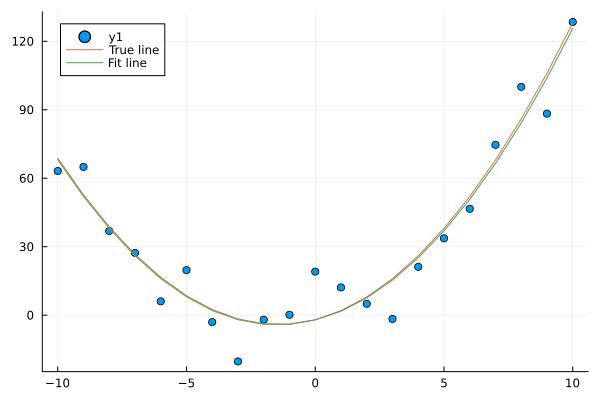

In [5]:
scatter(x,y_observed)
plot!(x,y_true,label = "True line")
plot!(x,fit(x,y_observed,2).(x),label = "Fit line")

poly_fit = fit(x,y_true,2)
y_fit = fit(x,y_true,2).(x)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

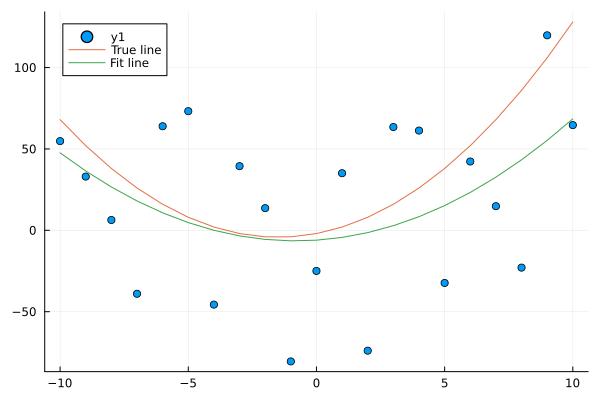

In [6]:
noise50 = rand(di.Normal(0,50),21)
y_observed50 = y_true .+ noise50
scatter(x,y_observed50)
plot!(x,y_true,label = "True line")
plot!(x,fit(x,y_observed50,2).(x),label = "Fit line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The plot with 50 std is farther from the y_true because the variance in the data shifts the fit away from the true equation. With higher variance/std the more inaccurate the data can become because too many data points in one direction could affect the trend of the data.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


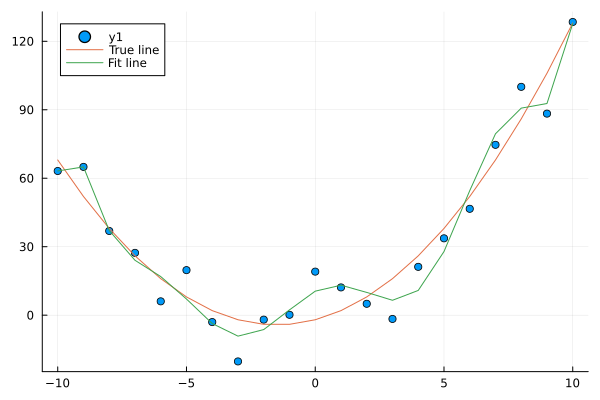

In [7]:
scatter(x,y_observed)
plot!(x,y_true,label = "True line")
plot!(x,fit(x,y_observed,10).(x),label = "Fit line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


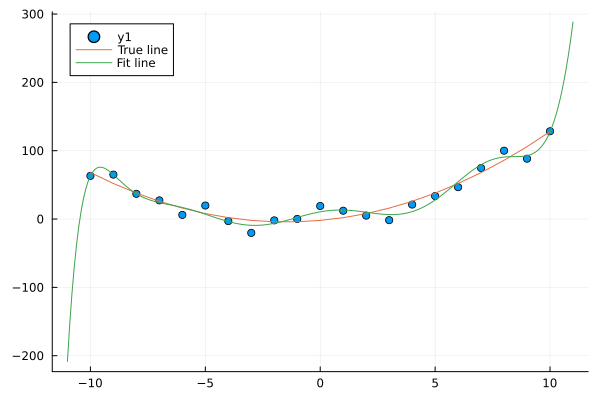

In [8]:
x_fit = collect(-11:.1:11)
scatter(x,y_observed)
plot!(x,y_true,label = "True line")
plot!(x_fit,fit(x,y_observed,10).(x_fit),label = "Fit line")

3. What do you observe in the plot? What is this phenomenon called?

The plot has steep curve in the data fit line at the ends. It is called overfitting the data. It most likely does not accurately resemble the real trend beyond the data points.